In this notebook,data is related to healthcare Industry having 768 observations with 10 variable. Target variable is diabetes. It looks like there is no missing value, and boolean, float , integers are different datatypes available. Well descriptive analysis shows that variable Glucose, BoodPressure,SckinThickness, Insulin and BMI have minimum value 0 which does not make any sense, these values are either missing or outliers

In [1]:
#Importing standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the csv file using pandas
data=pd.read_csv('pima-data.csv')


In [3]:
#glimpse of first 5 rows of the data
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [4]:
#shape of the dataframe
data.shape

(768, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    bool   
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


In [6]:
#description of the dataframe
data.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


In [7]:
#Making the target variable as string variable 
diabetes_map = {True: 'diab', False: 'no diab'}
data['diabetes'] = data['diabetes'].map(diabetes_map)

In [8]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,diab
1,1,85,66,29,0,26.6,0.351,31,1.1426,no diab
2,8,183,64,0,0,23.3,0.672,32,0.0000,diab
3,1,89,66,23,94,28.1,0.167,21,0.9062,no diab
4,0,137,40,35,168,43.1,2.288,33,1.3790,diab


<Figure size 720x480 with 0 Axes>

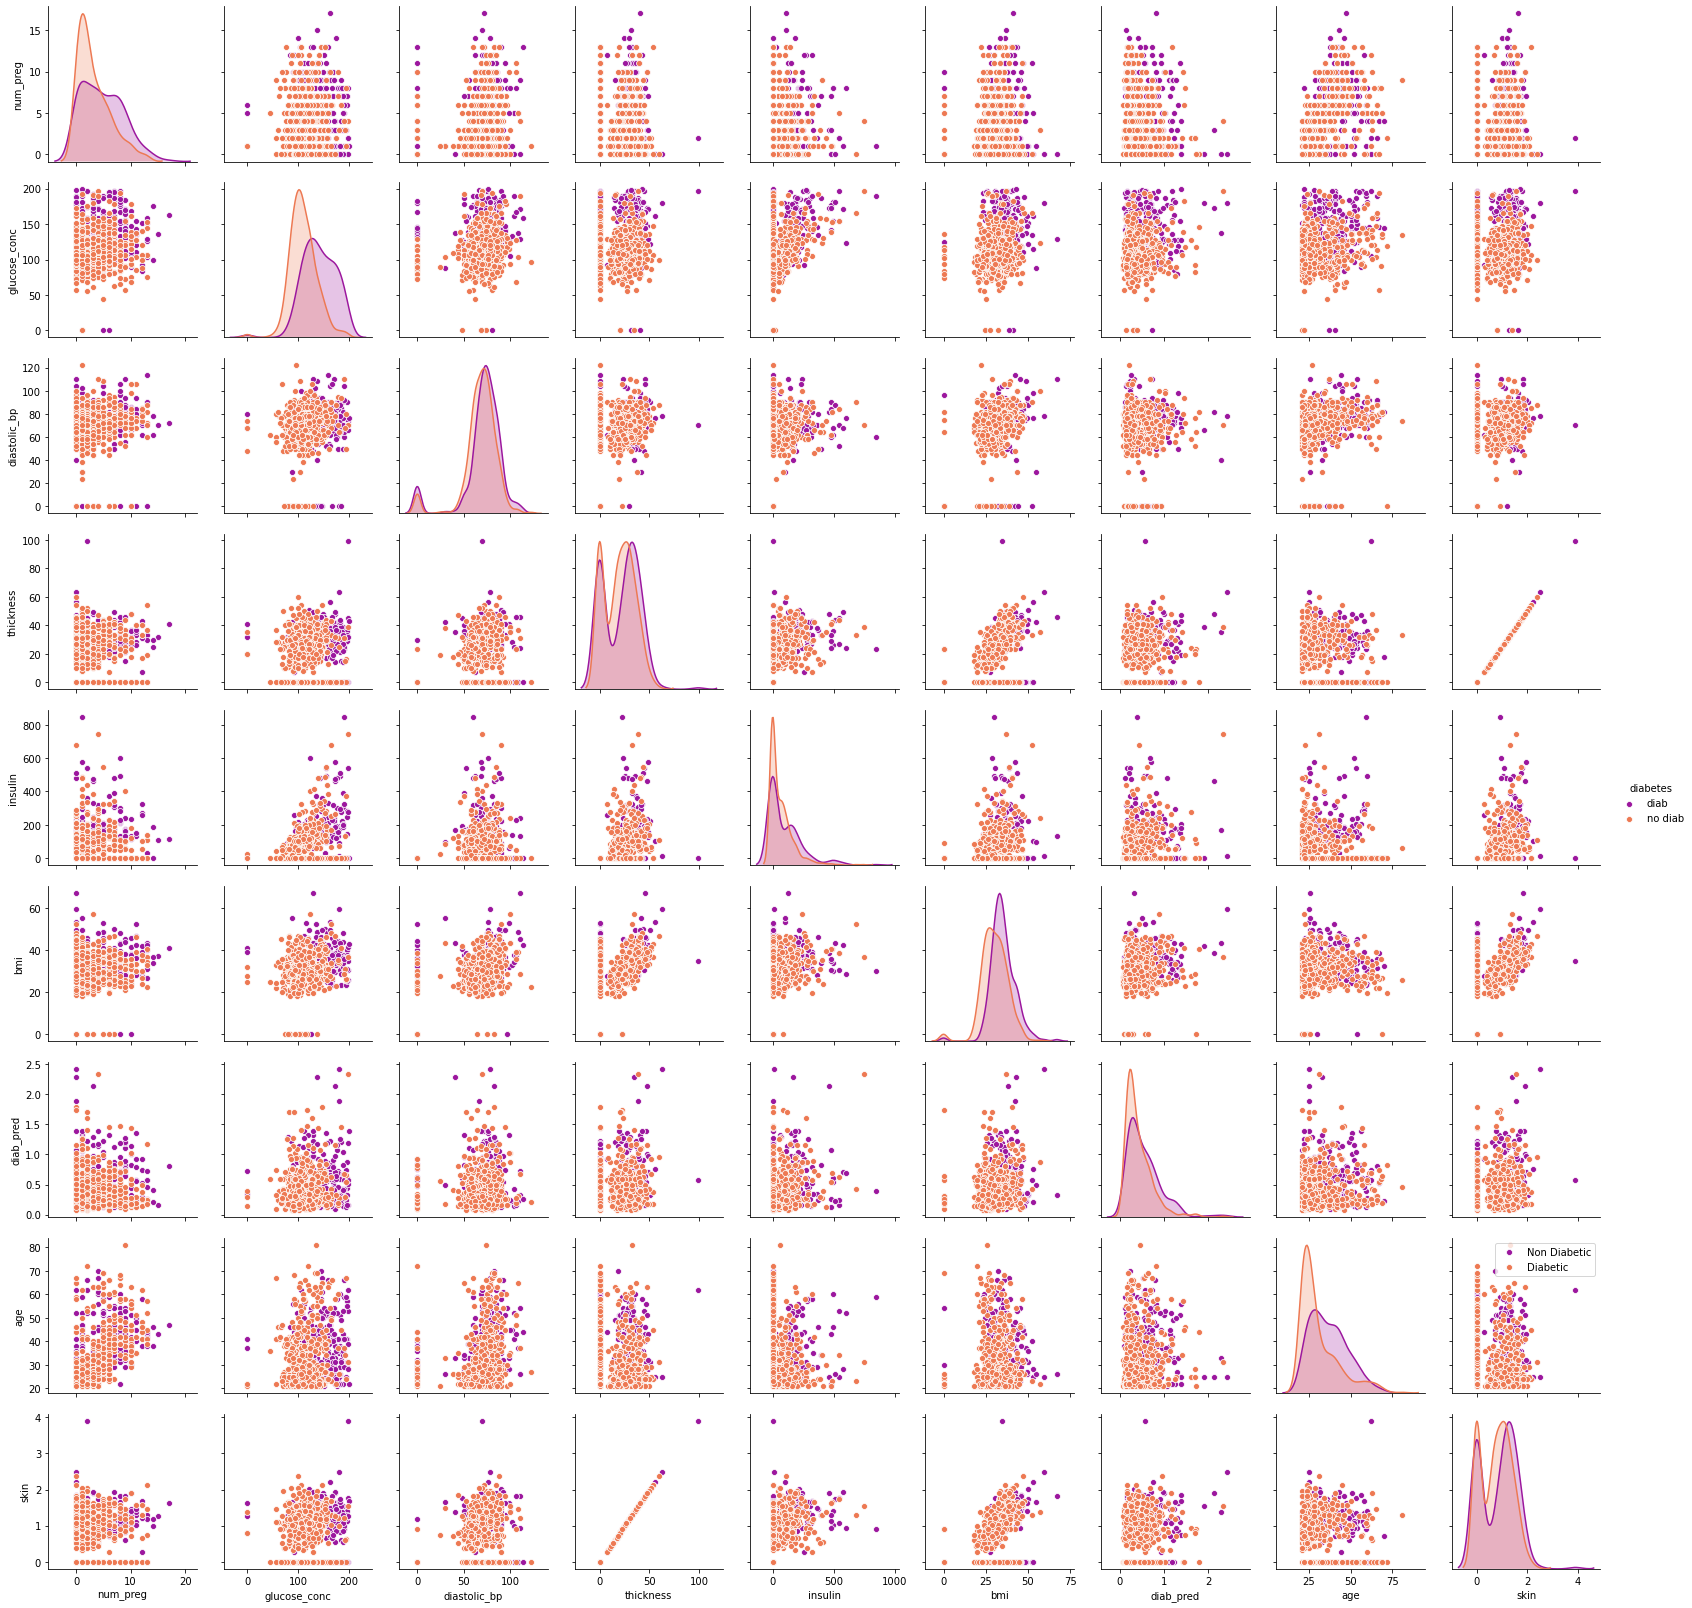

In [9]:
#Multi variate analysis
plt.figure(dpi = 120)
sns.pairplot(data,hue = 'diabetes',palette = 'plasma')
plt.legend(['Non Diabetic','Diabetic'])
plt.show()

Pregnancies, Insulin, DBF and Age having skewed distribution. We know most of the machine learning models uses assumpton of normality so these variables might need to be scaled, But we may consider the assumption to be true according Central Limit Theorem that if number of observation is large we can consider the distribution to be normal or bell shaped. Removing Outliers may also help us to achieve normal distribution of that variable.

It looks like Glucose, BP and BMI variables have some outliers.




# correlation

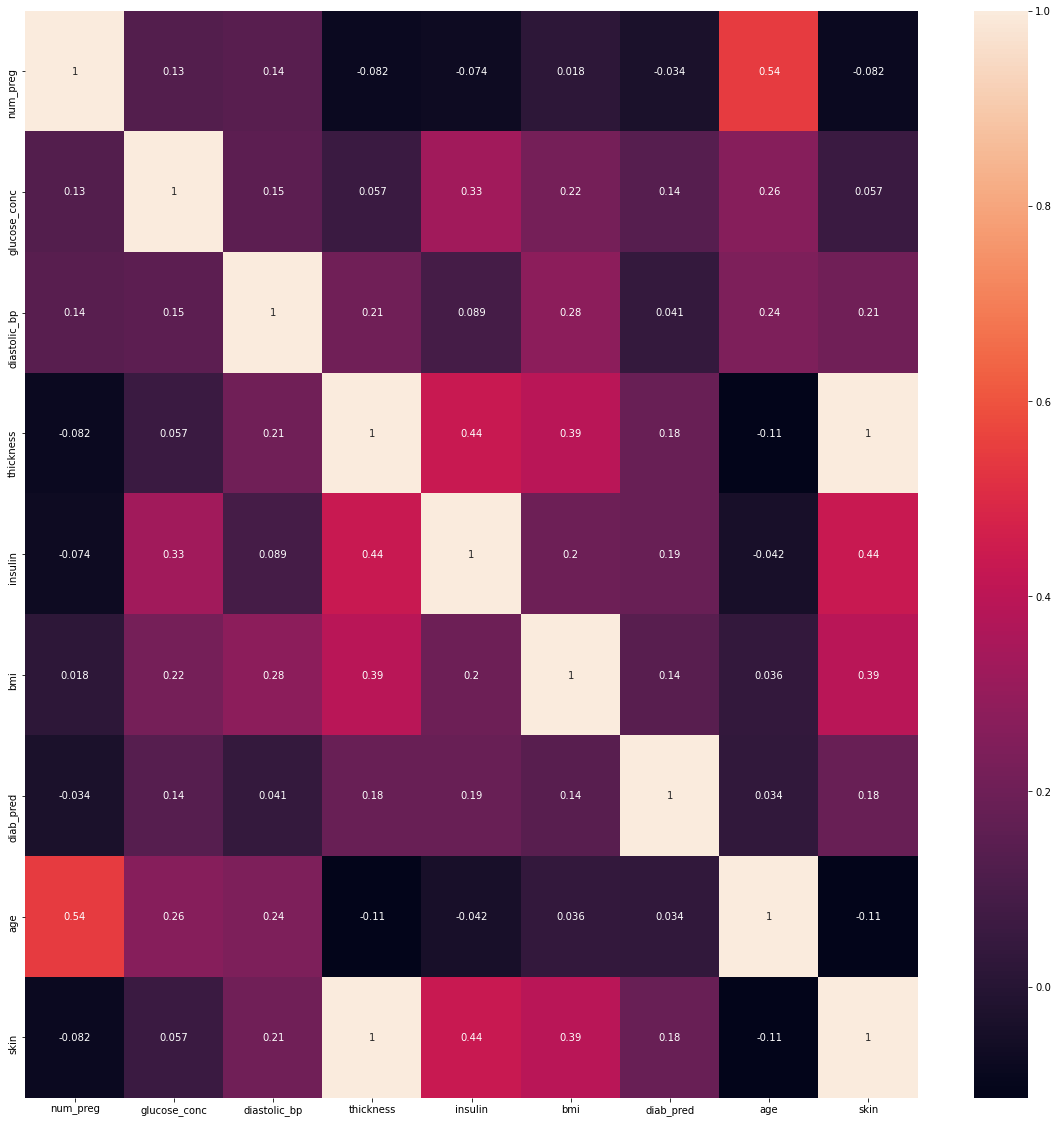

In [10]:
#Finding correlation between the variables
plt.figure(figsize=(20,20))
g=sns.heatmap(data.corr(),annot=True)

Joint plot of Glucose with Other Variables ==> 

Correlation between Glucose and num_preg ==>  0.129458671499273


<Figure size 500x400 with 0 Axes>

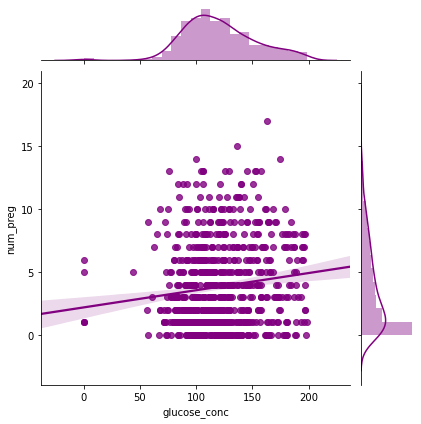

Correlation between Glucose and diastolic_bp ==>  0.15258958656866448


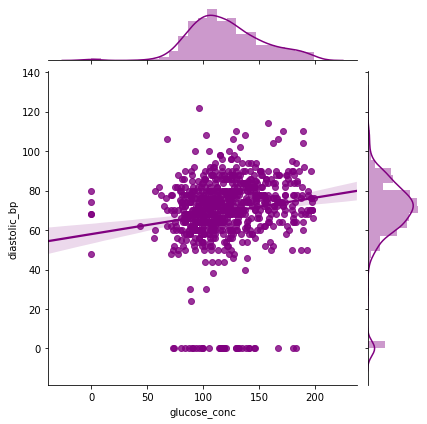

Correlation between Glucose and thickness ==>  0.057327890738176825


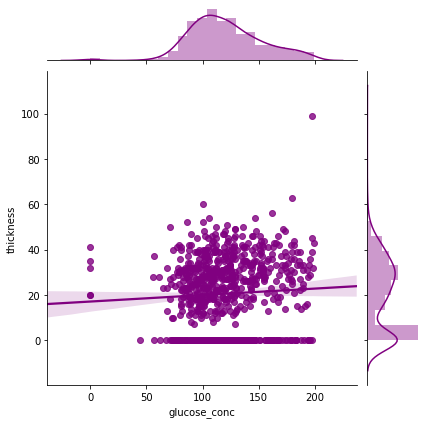

Correlation between Glucose and insulin ==>  0.3313571099202081


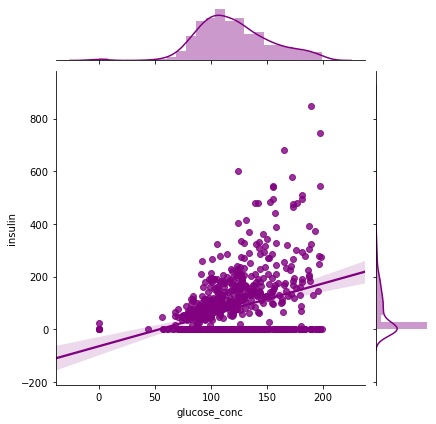

Correlation between Glucose and bmi ==>  0.22107106945898305


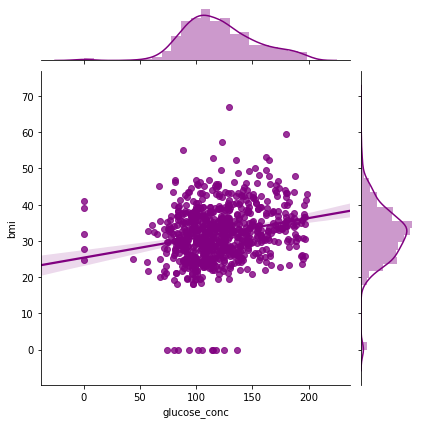

Correlation between Glucose and diab_pred ==>  0.1373372998283708


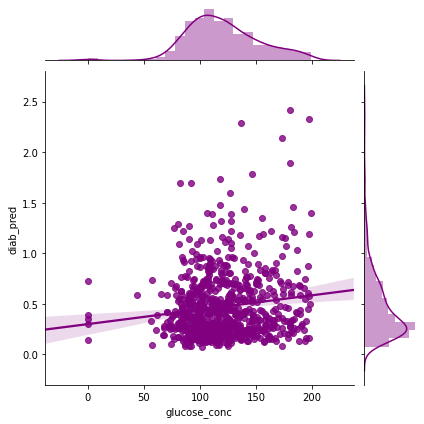

Correlation between Glucose and age ==>  0.26351431982433376


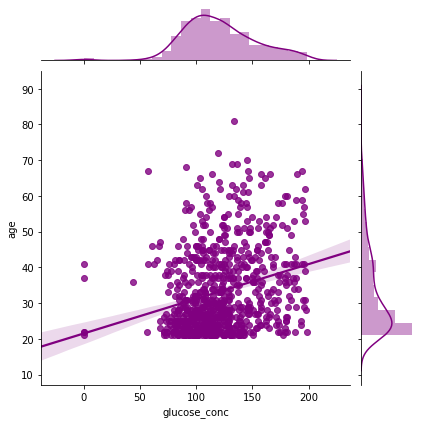

Correlation between Glucose and skin ==>  0.05732789073817714


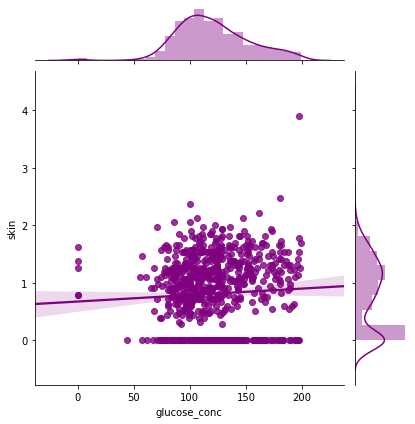

In [11]:
#Bivariate analysis
#Relation between glucose variable and other variables
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of Glucose with Other Variables ==> \n")
for i in  data.columns:
    if i != 'glucose_conc' and i != 'diabetes':
        print(f"Correlation between Glucose and {i} ==> ",data.corr().loc['glucose_conc'][i])
        sns.jointplot(x='glucose_conc',y=i,data=data,kind = 'regression',color = 'purple')
        plt.show()

Glucose and other variables shows similar positive weak linear association with other variable in given dataset.Increasing Glucose level in patients, Other variables will also increase. Weak linear association is good, so that we can escape out from Multicollinearity effect in Predective Modelling.

# Missing Values and outliers

In [12]:
#checking the availability of missing values
data.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

There is no missing values. But some variables have minimum = 0 and pregnancy variable has maximum = 17 which is not making sense. So let us explore these variables and treat them accordingly.

In [13]:
#Creating a function to know the outliers using Standard deviation based detection
def std_based(col_name,df):
    mean = df[col_name].mean()
    std = df[col_name].std()
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    new_df = df[(df[col_name] < upper) & (df[col_name] > lower)]
    return new_df

In [14]:
#checking the values as zero in each column
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing num_preg : {0}".format(len(data.loc[data['num_preg'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['diastolic_bp'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['diab_pred'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['age'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['skin'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing num_preg : 111
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [15]:
#Univariate analysis and handling missingvalues and outliers
#num_preg Variable
data['num_preg'].describe()


count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: num_preg, dtype: float64

In [16]:
preg_proportion = np.array(data['num_preg'].value_counts())
preg_month = np.array(data['num_preg'].value_counts().index)
preg_proportion_perc = np.array(np.round(preg_proportion/sum(preg_proportion),3)*100,dtype=int)

In [17]:
preg = pd.DataFrame({'month':preg_month,'count_of_preg_prop':preg_proportion,'percentage_proportion':preg_proportion_perc})
preg.set_index(['month'],inplace=True)
preg.head(10)

,count_of_preg_prop,percentage_proportion
month,,
1,135,17
0,111,14
2,103,13
3,75,9
4,68,8
5,57,7
6,50,6
7,45,5
8,38,4


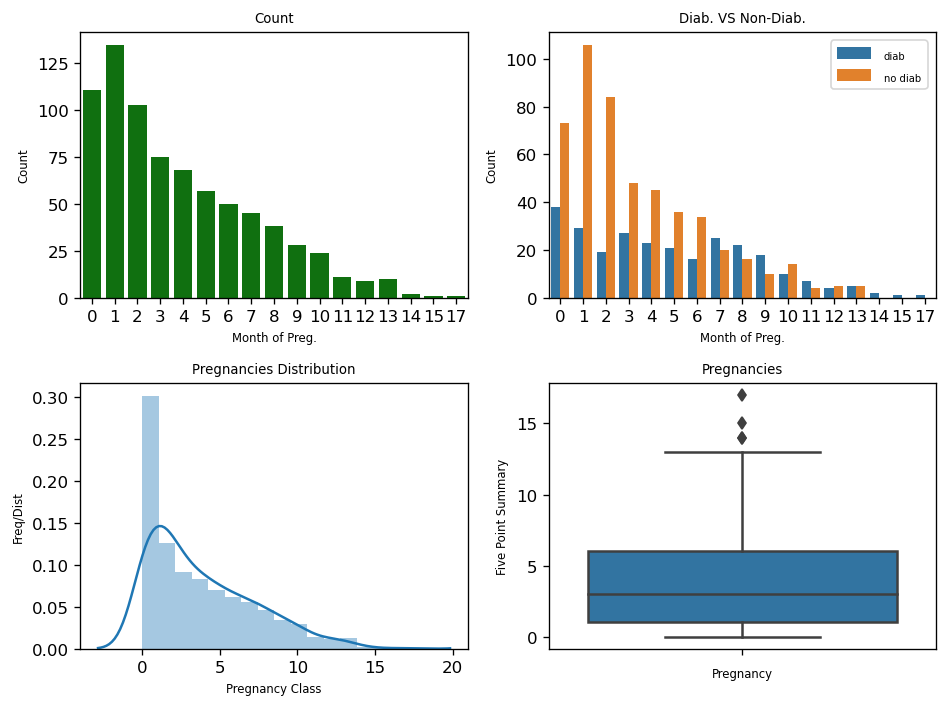

In [18]:
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (8,6))

plot00=sns.countplot('num_preg',data=data,ax=axes[0][0],color='green')
axes[0][0].set_title('Count',fontdict={'fontsize':8})
axes[0][0].set_xlabel('Month of Preg.',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.countplot('num_preg',data=data,hue='diabetes',ax=axes[0][1])
axes[0][1].set_title('Diab. VS Non-Diab.',fontdict={'fontsize':8})
axes[0][1].set_xlabel('Month of Preg.',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count',fontdict={'fontsize':7})
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot10 = sns.distplot(data['num_preg'],ax=axes[1][0])
axes[1][0].set_title('Pregnancies Distribution',fontdict={'fontsize':8})
axes[1][0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[1][0].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plt.tight_layout()

plot20 = sns.boxplot(data['num_preg'],ax=axes[1][1],orient='v')
axes[1][1].set_title('Pregnancies',fontdict={'fontsize':8})
axes[1][1].set_xlabel('Pregnancy',fontdict={'fontsize':7})
axes[1][1].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

The distribution of Pregnancies in data is unimodal and skewed to the right, centered at about 1 with most of the data between 0 and 15, A range of roughly 15, and outliers are present on the higher end.

BoxPlot shows that People with higher pregnancy months have higher risk of Diabetes

In [19]:
data = std_based('num_preg',data)

In [20]:
#glucose_conc variable
data['glucose_conc'].describe()

count    764.000000
mean     120.776178
std       31.946234
min        0.000000
25%       99.000000
50%      117.000000
75%      140.000000
max      199.000000
Name: glucose_conc, dtype: float64

Glucose = 0, does not make any sense.

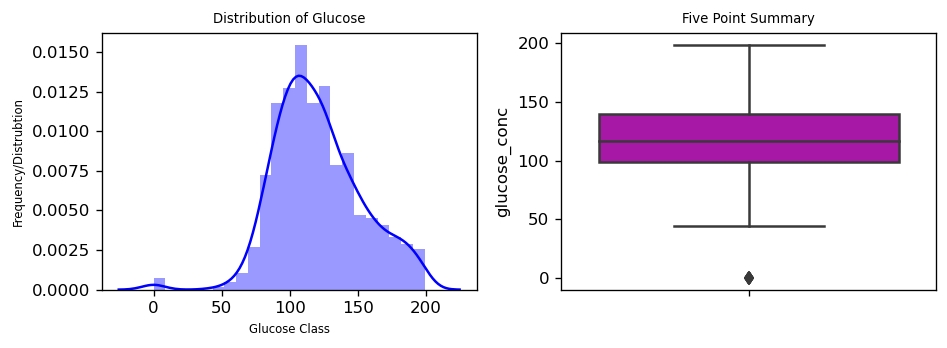

In [21]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,3))

plot00=sns.distplot(data['glucose_conc'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('glucose_conc',data=data,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

The distribution of Glucose level among patients is unimodal and roughly bell shaped, centered at about 115 with most of the data between 90 and 140, A range of roughly 150, and outliers are present on the lower end(Glucose ==0).

BoxPlot shows that People with higher Glucose level have higher risk of Diabetes.


There is no outlier and also distribution is normal , So i will treat 0 with mean value

data.glucose_conc = data.glucose_conc.replace(0,data.glucose_conc.mean())
data.head()

In [22]:
#diastolic_bp variable
data.diastolic_bp.describe()

count    764.000000
mean      69.098168
std       19.401789
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: diastolic_bp, dtype: float64

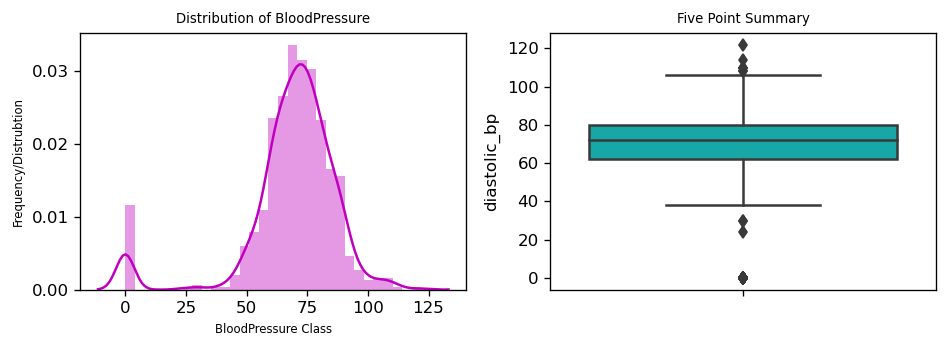

In [23]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,3))

plot00=sns.distplot(data['diastolic_bp'],ax=axes[0],color='m')
axes[0].set_title('Distribution of BloodPressure',fontdict={'fontsize':8})
axes[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('diastolic_bp',data=data,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

The distribution of BloodPressure among patients is unimodal (This is not a bimodal because BP=0 does not make any sense and it is Outlier) and bell shaped, centered at about 65 with most of the data between 60 and 90, A range of roughly 100.



Few Outliers at both higher end and lower end. But at higher end maximum BP is 122, So it is considerable. Now at lower end BP near 25 is not making sense. So i will treat missing value with medium and then i will also treat outliers.



In [24]:
data.diastolic_bp = data.diastolic_bp.replace(0,data.diastolic_bp.median())
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,diab
1,1,85,66,29,0,26.6,0.351,31,1.1426,no diab
2,8,183,64,0,0,23.3,0.672,32,0.0000,diab
3,1,89,66,23,94,28.1,0.167,21,0.9062,no diab
4,0,137,40,35,168,43.1,2.288,33,1.3790,diab


In [25]:
data  = std_based('diastolic_bp',data)

In [26]:
#thickness variable

In [27]:
data.thickness.describe()

count    756.000000
mean      20.428571
std       15.952377
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: thickness, dtype: float64

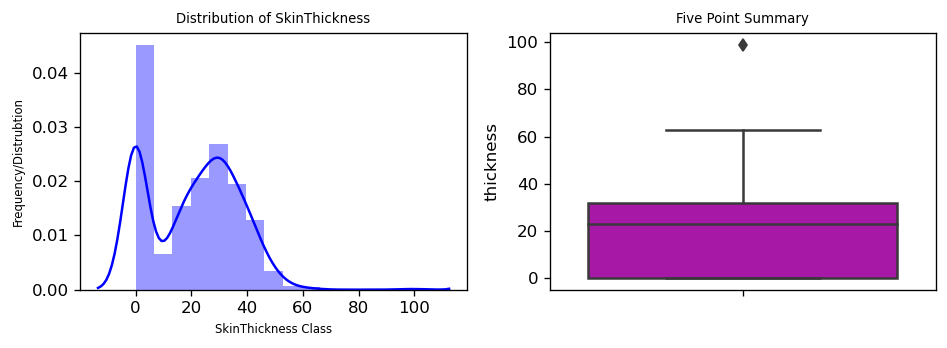

In [28]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,3))

plot00=sns.distplot(data['thickness'],ax=axes[0],color='b')
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('thickness',data=data,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

The distribution of SkinThickness among patients is looking like Bimodal (But i think, This is not a bimodal because ST=0 does not make any sense and it may effect distribution and it is bell shaped, centered at about 20 with most of the data between 15 and 45, A range of roughly 60 and outliers are present on the lower end(ST ==0).

In [29]:
data.thickness = data.thickness.replace(0,data.thickness.mean())
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35.000000,0,33.6,0.627,50,1.3790,diab
1,1,85,66,29.000000,0,26.6,0.351,31,1.1426,no diab
2,8,183,64,20.428571,0,23.3,0.672,32,0.0000,diab
3,1,89,66,23.000000,94,28.1,0.167,21,0.9062,no diab
4,0,137,40,35.000000,168,43.1,2.288,33,1.3790,diab


In [30]:
data = std_based("thickness",data)

In [31]:
# insulin variable
data.insulin.describe()

count    752.000000
mean      79.889628
std      115.995453
min        0.000000
25%        0.000000
50%       26.000000
75%      128.250000
max      846.000000
Name: insulin, dtype: float64

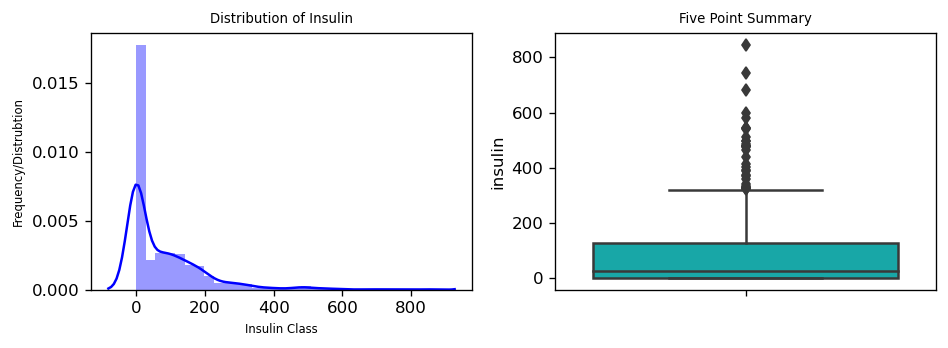

In [32]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,3))

plot00=sns.distplot(data['insulin'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('insulin',data=data,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

We can see there are many outliers. So i will fill 0 with Median of Insulin

In [33]:
data.insulin = data.insulin.replace(0,data.insulin.median())
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35.000000,26,33.6,0.627,50,1.3790,diab
1,1,85,66,29.000000,26,26.6,0.351,31,1.1426,no diab
2,8,183,64,20.428571,26,23.3,0.672,32,0.0000,diab
3,1,89,66,23.000000,94,28.1,0.167,21,0.9062,no diab
4,0,137,40,35.000000,168,43.1,2.288,33,1.3790,diab


In [34]:
data = std_based('insulin',data)

In [35]:
#bmi variable
data.bmi.describe()

count    734.000000
mean      31.649728
std        7.630830
min        0.000000
25%       27.025000
50%       32.000000
75%       36.100000
max       57.300000
Name: bmi, dtype: float64

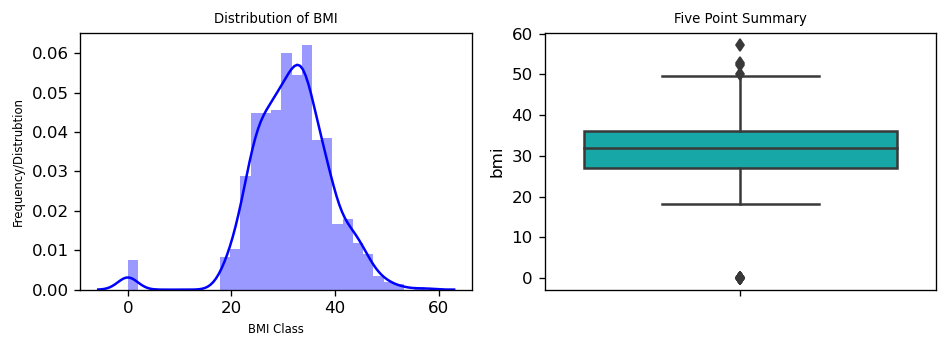

In [36]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,3))

plot00=sns.distplot(data['bmi'],ax=axes[0],color='b')
axes[0].set_title('Distribution of BMI',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('bmi',data=data,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Outliers are considerable, So i will replace zero with mean

In [37]:
data.bmi = data.bmi.replace(0,data.bmi.mean())
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35.000000,26,33.6,0.627,50,1.3790,diab
1,1,85,66,29.000000,26,26.6,0.351,31,1.1426,no diab
2,8,183,64,20.428571,26,23.3,0.672,32,0.0000,diab
3,1,89,66,23.000000,94,28.1,0.167,21,0.9062,no diab
4,0,137,40,35.000000,168,43.1,2.288,33,1.3790,diab


In [38]:
#diab_pred variable
data.diab_pred.describe()

count    734.000000
mean       0.464274
std        0.313676
min        0.078000
25%        0.244000
50%        0.367000
75%        0.612750
max        2.288000
Name: diab_pred, dtype: float64

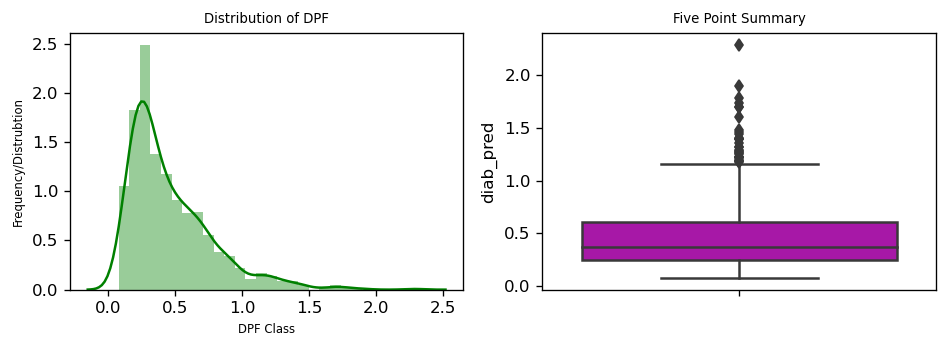

In [39]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,3))

plot00=sns.distplot(data['diab_pred'],ax=axes[0],color='green')
axes[0].set_title('Distribution of DPF',fontdict={'fontsize':8})
axes[0].set_xlabel('DPF Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('diab_pred',data=data,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Outliers are present at higher end. Let us treat them.

In [40]:
data = std_based('diab_pred',data)

In [41]:
#age variable
data.age.describe()

count    724.000000
mean      33.111878
std       11.711371
min       21.000000
25%       24.000000
50%       29.000000
75%       40.000000
max       81.000000
Name: age, dtype: float64

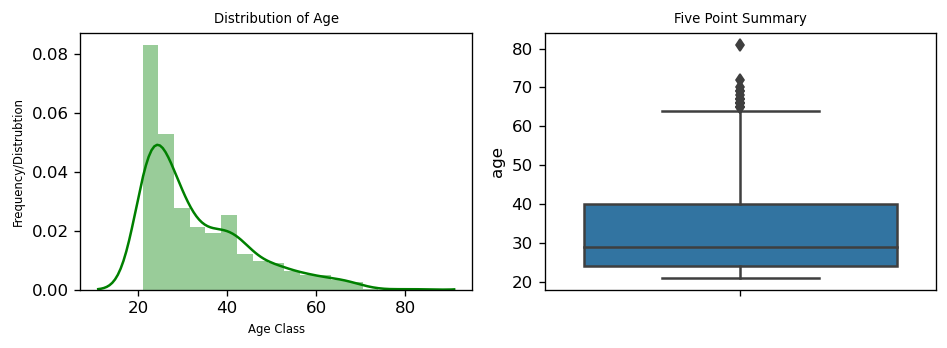

In [42]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,3))

plot00=sns.distplot(data['age'],ax=axes[0],color='green')
axes[0].set_title('Distribution of Age',fontdict={'fontsize':8})
axes[0].set_xlabel('Age Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('age',data=data,ax=axes[1],orient = 'v')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [43]:
data = std_based('age',data)


In [44]:
#skin variable
data.skin.describe()

count    719.000000
mean       0.783123
std        0.610471
min        0.000000
25%        0.000000
50%        0.866800
75%        1.260800
max        2.127600
Name: skin, dtype: float64

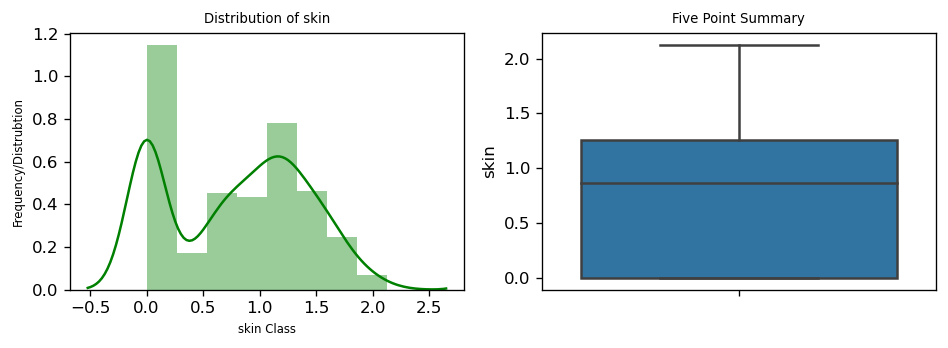

In [45]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,3))

plot00=sns.distplot(data['skin'],ax=axes[0],color='green')
axes[0].set_title('Distribution of skin',fontdict={'fontsize':8})
axes[0].set_xlabel('skin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('skin',data=data,ax=axes[1],orient = 'v')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [46]:
data.skin = data.skin.replace(0,data.skin.mean())
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35.000000,26,33.6,0.627,50,1.379000,diab
1,1,85,66,29.000000,26,26.6,0.351,31,1.142600,no diab
2,8,183,64,20.428571,26,23.3,0.672,32,0.783123,diab
3,1,89,66,23.000000,94,28.1,0.167,21,0.906200,no diab
5,5,116,74,20.428571,26,25.6,0.201,30,0.783123,no diab


In [47]:
data = std_based('skin',data)

Done with missing values and outliers

In [48]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35.000000,26,33.6,0.627,50,1.379000,diab
1,1,85,66,29.000000,26,26.6,0.351,31,1.142600,no diab
2,8,183,64,20.428571,26,23.3,0.672,32,0.783123,diab
3,1,89,66,23.000000,94,28.1,0.167,21,0.906200,no diab
5,5,116,74,20.428571,26,25.6,0.201,30,0.783123,no diab


In [49]:
diabetes_map = {'diab': 1, 'no diab': 0}
data['diabetes'] = data['diabetes'].map(diabetes_map)

In [50]:
#counting the number of 1's and 0's
diabetes_true_count=len(data.loc[data['diabetes']==1])
diabetes_false_count=len(data.loc[data['diabetes']==0])
(diabetes_true_count,diabetes_false_count)

(242, 475)

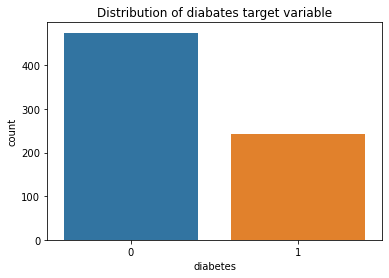

In [51]:
sns.countplot(data['diabetes']).set_title('Distribution of diabates target variable')
plt.show()

# Train-test-split

In [52]:
from sklearn.model_selection import train_test_split
feature_columns = ['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'age']
predicted_class = ['diabetes']

In [53]:
X = data[feature_columns].values
y = data[predicted_class].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)


# Standardization

In [54]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

# Model creation for predicting Diabetes

# KNN algorithm

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

knn = KNeighborsClassifier()

param_grid = {'n_neighbors':[5,10,15,25,30,50]}

grid_knn = GridSearchCV(knn,param_grid,scoring='accuracy',cv = 10,refit = True)


In [56]:
grid_knn.fit(X_train_std,y_train)
print("Best Score ==> ", grid_knn.best_score_)
print("Tuned Paramerers ==> ",grid_knn.best_params_)
print("Accuracy on Train set ==> ", grid_knn.score(X_train_std,y_train))
print("Accuracy on Test set ==> ", grid_knn.score(X_test_std,y_test))

Best Score ==>  0.8023952095808383
Tuned Paramerers ==>  {'n_neighbors': 10}
Accuracy on Train set ==>  0.8303393213572854
Accuracy on Test set ==>  0.6944444444444444


# Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

param_grid = {'criterion':['gini','entropy'],'max_depth':np.arange(2,10),'min_samples_leaf':[0.1,0.2,0.3,0.4,0.5]}

grid_dtc = GridSearchCV(dtc,param_grid,scoring='accuracy',cv = 10,refit = True)

In [58]:
grid_dtc.fit(X_train_std,y_train)
print("Best Score ==> ", grid_dtc.best_score_)
print("Tuned Paramerers ==> ",grid_dtc.best_params_)
print("Accuracy on Train set ==> ", grid_dtc.score(X_train_std,y_train))
print("Accuracy on Test set ==> ", grid_dtc.score(X_test_std,y_test))

Best Score ==>  0.7864271457085829
Tuned Paramerers ==>  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 0.1}
Accuracy on Train set ==>  0.8063872255489022
Accuracy on Test set ==>  0.6898148148148148


# XGBoost Classifier

In [59]:
# Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [60]:
# Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [61]:
classifier=xgboost.XGBClassifier()

In [62]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [63]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [64]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train_std,y_train.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 5.08 seconds.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.8s finished


In [65]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.25, max_delta_step=0, max_depth=5,
       min_child_weight=5, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [66]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=5,
       min_child_weight=7, missing=None, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [67]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train_std,y_train,cv=10)

C:\Users\home\Anaconda3\envs\nikhilenv\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\home\Anaconda3\envs\nikhilenv\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\home\Anaconda3\envs\nikhilenv\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\home\Anaconda3\envs\nikhilenv\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

In [68]:
score

array([0.76470588, 0.84313725, 0.72      , 0.78      , 0.78      ,
       0.76      , 0.78      , 0.84      , 0.74      , 0.79591837])

In [69]:
print('The accuracy using xgboot is:{0}'.format(score.mean()))

The accuracy using xgboot is:0.780376150460184


# Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [71]:
logreg.fit(X_train_std,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
#calculating accuracy
acc_logreg = cross_val_score(logreg, X_train_std, y_train.ravel(), cv = 10, scoring = 'accuracy').mean()
print('The accuracy using logistic regression :{}'.format(acc_logreg))

The accuracy using logistic regression :0.7843353341336534


In [73]:
#Make class predictions for the validation set.
from sklearn.model_selection import cross_val_predict
y_pred_class_logreg = cross_val_predict(logreg, X_train, y_train.ravel(), cv = 10)

In [74]:
#Creating confusion matrix
from sklearn import metrics
logreg_matrix = metrics.confusion_matrix(y_train, y_pred_class_logreg)
print(logreg_matrix)

[[307  32]
 [ 77  85]]


In [75]:
#creating classification report
report_logreg = metrics.classification_report(y_train, y_pred_class_logreg)
print(report_logreg)

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       339
          1       0.73      0.52      0.61       162

avg / total       0.78      0.78      0.77       501



KNN algorithm and decision tree algorithms predicting pretty well comparing to others